In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import*

$$
\int r \phi'_i \phi'_k dr
$$

In [2]:
rim, ri, rip, h, r, cim, cip = symbols("r_{i-1} r_i, r_{i+1}, h, r, c_{i-1}, c_{i+1}", real=True, positive=True)

In [3]:
eq_i_i_l = factor(integrate(cim*r*(1/h)*(1/h), (r, rim, ri)))
eq_i_i_l = eq_i_i_l.subs(ri - rim, h)
eq_i_i_l

c_{i-1}*(r_i + r_{i-1})/(2*h)

In [4]:
eq_i_i_r = factor(integrate(cip*r*(1/h)*(1/h), (r, ri, rip)))
eq_i_i_r = eq_i_i_r.subs(rip - ri, h)
eq_i_i_r

c_{i+1}*(r_i + r_{i+1})/(2*h)

In [5]:
simplify(factor(eq_i_i_l + eq_i_i_r).subs(rim, ri - h).subs(rip, h + ri))

c_{i+1}/2 + c_{i+1}*r_i/h - c_{i-1}/2 + c_{i-1}*r_i/h

In [6]:
eq_im_i = factor(integrate(cim* r*(-1/h)*(1/h), (r, rim, ri)))
eq_im_i = eq_im_i.subs(ri - rim, h).subs(rim, ri - h)
eq_im_i

-c_{i-1}*(-h + 2*r_i)/(2*h)

In [7]:
eq_ip_i = factor(integrate(cip* r*(1/h)*(-1/h), (r, ri, rip)))
eq_ip_i = simplify(eq_ip_i.subs(rip - ri, h).subs(rip, ri + h))
factor(eq_ip_i)

-c_{i+1}*(h + 2*r_i)/(2*h)

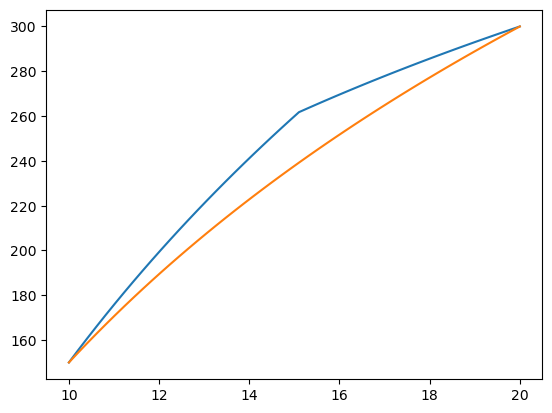

In [8]:
N = 50
r0 = 10
r1 = 20
h = (r1 - r0)/N
T0 = 150
T1 = 300
c0 = 2
c1 = 4

M = np.zeros((N, N))
v = np.zeros(N)

M[0, 0] = 1
M[N-1, N-1] = 1

v[0] = T0
v[N-1] = T1

for i in range(1, N-1):
    for k in range(N):
        if k < N/2:
            cim = c0
            cip = c0
        elif k > N/2:
            cim = c1
            cip = c1
        elif k == N/2:
            cim = c1
            cip = c0
        
        ri = (r0 + i*h)
        if i == k:
            M[i, k] = 0.5*(-cip + cim) + (cip*ri + cim*ri)/h
        elif k == (i - 1):
            M[i, k] = -cim * (-h + 2*ri)/(2*h)
        elif k == (i + 1):
            M[i, k] = -cip * (h + 2*ri)/(2*h)
    
a = np.linalg.solve(M, v)

c = (T1 - T0)/np.log(r1/r0)
r = np.linspace(r0, r1, N)
T = [T0 + c*np.log(ri/r0) for ri in r]

plt.plot(r, a)
plt.plot(r, T)